<a href="https://colab.research.google.com/github/rpradata-ud/DSPS_RPradata/blob/main/HW/HW4/HW4_MWrotCurve_RPradata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

prepared by federica b bianco @fedhere
for UDel DSPS PHYS 461/661

# testing the "significance" of Dark Matter

In [1]:
...

#package I will use for constants and units conversion
import astropy
from astropy.constants import G

#package used to display latex formuale
from IPython.display import Latex

import pandas as pd

from matplotlib import pyplot as plt


In 1970 Vera Rubin published a seminal paper: she measured the rotational speed of HII regions in several galaxies and how it changed as a function of distance to the center of the galaxy. If we believe Newtonian gravity (or GR) we expect that _once all of the mass is included_, i.e. at a radius distance from the center of the galaxy larger than the radius of the galaxy itself, the rotational speed will be proportional to $v\propto\frac{1}/{r}$

## Propagation of  uncertainties rules

below are the basic rules for propagation of uncertainties - use [this as reference](https://github.com/fedhere/DSPS/blob/master/resources/Managing%20Errors%20and%20Uncertainty.pdf)




$$
\begin{eqnarray}
z = x  \pm y  ~| & ~  &dz = \sqrt{dx^2 + dy^2}
\\
z = x * y  ~| & ~& dz = |xy|  \sqrt{\left(\frac{dx}{x}\right)^2 +
                                \left(\frac{dy}{y}\right)^2} \\
z = x / y  ~| & ~& dz = \left|\frac{x}{y}\right| \sqrt{\left(\frac{dx}{x}\right)^2 +
                                                   \left(\frac{dy}{y}\right)^2} \\
z = x^n ~| & ~& dz = |n| ~ x^{n-1}  dx \\
z = \mathrm{c}x ~| & ~& dz = |\mathrm{c}| ~dx \\
z = f(x, y) ~| & ~& dz = \sqrt{\left(\frac{\partial f}{\partial x}\right)^2 dx^2 +\left(\frac{\partial f}{\partial y}\right)^2 dy^2} \\
\end{eqnarray}
$$


# let's assume a Newtonian framework:
the velocity of a body in orbit depends only on the gravitational field of the mass that attracts it, and we can assume that mass is concentrated in the center of mass of (the center for simplicity) the system

with G the gravitational constant, $r$ the radius, and $m(r)$ the mass contained within that radius we have the orbital velocity $v$:



$v^2 = \frac{G \cdot m(r)}{r}$


Derive this $v\propto\frac{1}{r}$ from Newron's law $F~=~\frac{GMm}{r^2}$. Write each formula and describe each step. You can use latex (you really just need to know ```\frac{}``` and ```^```) and this reference
https://www.physicsclassroom.com/calcpad/circgrav

From $F~=~\frac{GMm}{r^2}$
we have that the centripetal force of a mass m is $F=\frac{mv^2}{r}$.
Then, equating these two force equations:
$\frac{mv^2}{r}=\frac{GMm}{r^2}$,
and cancel out terms i.e. $r$ and $m$ from both sides.
Then, we have $v^2=\frac{GM}{r}$, hence $v^2\propto\frac{1}{r}$.


## M31 rotational curve

### data ingestion
( I store the original paper as a link on another computer now I have to find it again :-( - sorry I will updat the reference )

Get the data from the github repository https://github.com/fedhere/DSPS/tree/master/HW4 : there are 2 files: mw.csv and m31.csv. Start with M31, the Andromeda galaxy, Vera Rubin's original target.

Note that the data contains 2 types of uncertainties: one significantly smaller than the other. The ```dv``` uncertainty is the propagation of the uncertainty in the location of the HII line. The uncertainty called ```err``` if the full error budget:  including _all_ sources of uncertainty and not just the uncertainty in measuring the location of the line. Retain both, you will test your hypothesis with each one to see if it matters which uncertainty you choose

In [2]:
m31 = pd.read_csv('https://raw.githubusercontent.com/fedhere/DSPS_FBianco/main/HW4/m31.csv', delimiter=',', header=1, skipfooter=1)


<ipython-input-2-08cfac99e75a>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  m31 = pd.read_csv('https://raw.githubusercontent.com/fedhere/DSPS_FBianco/main/HW4/m31.csv', delimiter=',', header=1, skipfooter=1)


In [3]:
m31.head()


,#R(kpc,V(km/s),St.dev.,St.error
0,0.100,183.939,0.000,0.000
1,0.120,190.710,10.265,12.191
2,0.144,204.141,22.634,21.808
3,0.173,207.601,4.573,4.200
4,0.207,210.188,3.943,3.258


In [4]:
m31.shape

(54, 4)

In [5]:
m31.rename({'#R(kpc': "r", "V(km/s)":"v", "St.dev.": "dv", "St.error":"err"}, axis=1, inplace = True)

m31


,r,v,dv,err
0,0.100,183.939,0.000,0.000
1,0.120,190.710,10.265,12.191
2,0.144,204.141,22.634,21.808
3,0.173,207.601,4.573,4.200
4,0.207,210.188,3.943,3.258
5,0.249,213.512,4.218,3.190
6,0.299,217.208,3.813,2.623
7,0.358,219.673,2.181,1.371
8,0.430,219.357,2.193,1.259
9,0.516,216.163,3.740,1.961


# exploratory data analysis
proceed with at least a few basic exploratory tasks

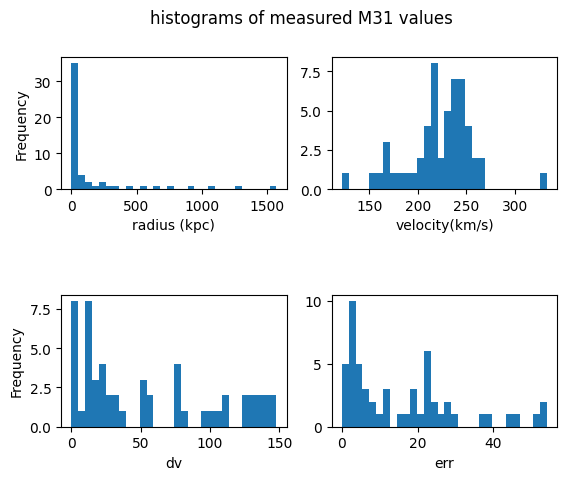

In [6]:
...

fig, ax = plt.subplots(2,2)
fig.suptitle("histograms of measured M31 values")
ax[0,0].hist(m31['r'], bins=30)
ax[0,0].set_xlabel("radius (kpc)")
ax[0,0].set_ylabel("Frequency")

ax[0,1].hist(m31['v'], bins=30)
ax[0,1].set_xlabel("velocity(km/s)")

ax[1,0].hist(m31['dv'], bins=30)
ax[1,0].set_xlabel("dv")
ax[1,0].set_ylabel("Frequency")

ax[1,1].hist(m31['err'], bins=30)
ax[1,1].set_xlabel("err")



fig.subplots_adjust(hspace=0.8)

plt.show()

Figure 1: Histograms visualizing the Andromeda galaxy radius and velocity measurements, as well as the uncertainties "dv" and "err". In the top left plot, we can observe that most of the radii measured is around 0-50 kpc, yet they range to slightly above 1500 kpc. Looking at the velocity graph, we can observe a hint of somewhat inverse relationship between this quantity and the radius. Unlike the latter, the frequency of measured velocity increases and peaks around the middle values of the observations. However, it decreases afterwards, which would lead towards what we aim to study. In addition, the uncertainties are shown in the bottom panels, where, as seen in the data frame values of dv become significantly larger than err as we progress in radius.

from https://en.wikipedia.org/wiki/Andromeda_Galaxy get the extent of the luminous component of M31 (Andromeda). The distance of the Galaxy multiplied by the angular size will give you this information from basic trigonometry (make sure you convert the units properly, using astropy). Make sure you include the uncertainties! uncertainties in the distance will give you the uncertainty in the size
   


In [7]:
...

apparentSizeM31 = 3.167


In [8]:
# note : by PEP8 standards the import should be at the top, I leave it here for hyou to see that I am using astropy.units now
from astropy import units as u

m31angS = apparentSizeM31 * u.degree

#using a = s/d

print("Angular Size of the visible component of Andromeda: {:.2f}".format(m31angS.to(u.rad)  ))

Angular Size of the visible component of Andromeda: 0.06 rad


Please make sure you print a sensible number of decimal digits! you have a  number of significant digits set by the number of digit in the info you get from wikipedia

The distance, from Wikipedia, will have an uncertainty. Convert both to kiloparsecs Kpc

In [9]:
...

#distance from wikipedia

m31Dist = 2.57*(10**6) * u.lightyear
m31DistError = 0.06*(10**6) * u.lightyear

print("Distance of Andromeda: ", r"{:.2f} +/ {:.2f}".format(m31Dist.to(u.kpc), m31DistError.to(u.kpc)  ))


Distance of Andromeda:  787.97 kpc +/ 18.40 kpc


In [10]:
#now calculating physical size. use small angle approx
#use radius = dist * sin(alpha) ~ dist * alpha (in rad)

m31angS = m31angS.to(u.rad).value

m31Dist = m31Dist.to(u.kpc)
m31DistError = m31DistError.to(u.kpc)

m31Size = m31Dist * m31angS
m31SizeError =m31DistError * m31angS

m31Size, m31SizeError


(<Quantity 43.55446456 kpc>, <Quantity 1.01683575 kpc>)

In [11]:
...
print("Size of the visible component of Andromeda: " +
      r"{:.2f} +/- {:2.2f}".format(m31Size, m31SizeError))#, m31SizeError



#angular size * radius? radius only gives half y. so that we can evaluate radius for next step


Size of the visible component of Andromeda: 43.55 kpc +/- 1.02 kpc


Print the distance like I printed the angular size.

To get the physical size of the visible component of andtomeda you can use simple trigonometry: $y = r * sin(\alpha) ~ \sim ~ r \alpha $ for small angles


Print the physical size of the Andromeda galaxy (remember decimal digits, proper formatting etc etc).


### find the first measurement  in your data table that includes all the luminous mass.

What is the smallest radius in your data where the luminous mass is completely included and what is the veolcity at that radius?
You can do it by broadcasting (see homework 3)

In [12]:
# r31_lum = ((m31['r'] >= m31Size))
# r31_lums = m31['r'][r31_lum]

# r31_lum_min = r31_lums.min()
# r31_lum_cond = (m31['r'] == r31_lum_min).iloc()
# #now do for all 4 extracted

# r31_ext = m31['r'][r31_lum_cond]
# v31_ext = m31['v'][r31_lum_cond]
# dv31_ext = m31['dv'][r31_lum_cond]
# err31_ext = m31['err'][r31_lum_cond]

# r31_lum_cond

#these broadcastings keep on giving me Series format. so I asked Paula for help

r31_ext = m31[m31['r'] >= m31Size].sort_values(by = 'r').iloc[0][0]
v31_ext = m31[m31['r'] >= m31Size].sort_values(by = 'r').iloc[0][1]

#sort_values will sort that the new concatenated values will move to upper 1st row.
#and then iloc will give the row and column. it's already organized in a way that the smallest comes first.

In [13]:
print("Smallest radius where luminous mass  is completely included for Andromeda: " +
      r"{:.2f}".format(r31_ext * u.kpc) +"\n its velocity: "+r"{:.2f}".format(v31_ext * (u.kilometer/ u.second )))

Smallest radius where luminous mass  is completely included for Andromeda: 49.22 kpc
 its velocity: 237.07 km / s


We expect the velocity to decrease as 1/r if all mass is included: the velocity at a radius twice as far as the radius that includes all the mass should be a factor 2 slower, three times as far a factor 3 slower.

write a function that

1. finds the smallest radius in the dataset that is at least N times the radius of the visible galaxy,

2. takes as arguments:
    - the data and
    - N
    - the size of the luminous component of the galaxy

2. Returns the value of the radius and its uncertainty and the velocity and its uncertainty

In [14]:
# first measurement including all mass
#not take account the errors in finding the values

def getradii(data, N, lum_size):
  datar_ext = data[data['r'] >= N * lum_size].iloc[0][0]
  datav_ext = data[data['r'] >= N * lum_size].iloc[0][1]
  datadv_ext = data[data['r'] >= N * lum_size].iloc[0][2]
  dataerr_ext = data[data['r'] >= N * lum_size].iloc[0][3]

  return datar_ext, datav_ext, datadv_ext, dataerr_ext




...

Ellipsis

### data visualization

make a plot that shows

1. the rotational curve of the galaxy (as a line)

2. each velocity as an errorbar with error equal to err in the same color as the line in 1

3. each velocity as an errorbar with error equal to dv in  the same color but a different line thickness


4. the datapoint corresponding to N=1, 2, 3 each in a different color.

5. add a legend that indicates the meaning of each color (```pl.legend()```)

6. add a text that indicates the velocity and its uncertainty (dv and err) just below the largest errorbar (```pl.text()```)

7. limit the x axis to the "relevant" portion of the data

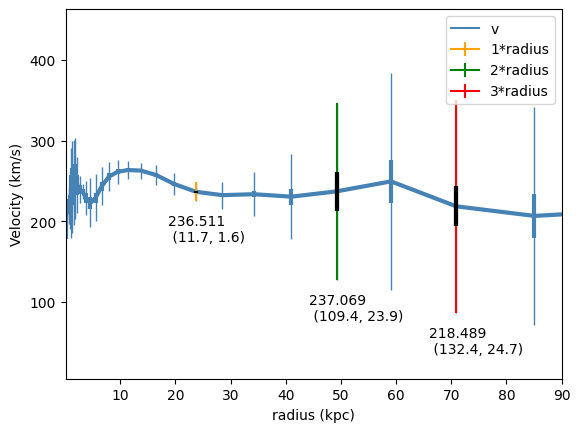

In [15]:
from matplotlib import pyplot as plt

#want to shrink the size to r <= 90

# rad = m31['r'][m31['r']<=90]
# vel = m31['v'][m31['r']<=90]
# dv = m31['dv'][m31['r']<=90]
# err = m31['err'][m31['r']<=90]

def plotGal(gal, rds):

  # plt.errorbar(gal['r'][m31['r']<=90][0], gal['r'][m31['r']<=90][1], yerr=gal['r'][m31['r']<=90][3], linewidth=3, zorder=2, color='steelblue' )
  # plt.errorbar(gal['r'][m31['r']<=90][0], gal['r'][m31['r']<=90][1], yerr=gal['r'][m31['r']<=90][2], linewidth=1, zorder=1, color='steelblue' )
#that's not how you limit the x-axis^

  # plt.show()
  plt.plot(gal['r'], gal['v'], linewidth=1.5, zorder=-1, color='steelblue', label='v')
  plt.errorbar(gal['r'], gal['v'], yerr=gal['err'], linewidth=3, zorder=2, color='steelblue')
  plt.errorbar(gal['r'], gal['v'], yerr=gal['dv'], linewidth=1, zorder=1, color='steelblue' )





  ###############################################################################
  #4. the datapoint corresponding to N=1, 2, 3 each in a different color.

#btw, the radius for m31 is m31Size / 2 (DIVIDE IT BY 2) because we computed it in diameters.
#^ https://en.wikipedia.org/wiki/Angular_diameter
  plt.errorbar(getradii(gal, 1, rds)[0], getradii(gal, 1, rds)[1], yerr=getradii(gal, 1, rds)[3], linewidth=3, zorder=4, color='black')
  #plt.annotate('%.3f \n (%.1f, %.1f)' % (getradii(gal, 1, rds)[1], getradii(gal, 1, rds)[2], getradii(gal, 1, rds)[3]), xy = (getradii(gal, 1, rds)[0], getradii(gal, 1, rds)[1]))
  plt.text(getradii(gal, 1, rds)[0]-5, getradii(gal, 1, rds)[1] - getradii(gal, 1, rds)[2] - 50, '%.3f \n (%.1f, %.1f)' % (getradii(gal, 1, rds)[1], getradii(gal, 1, rds)[2], getradii(gal, 1, rds)[3]))
  plt.errorbar(getradii(gal, 1, rds)[0], getradii(gal, 1, rds)[1], yerr=getradii(gal, 1, rds)[2], linewidth=1.5, zorder=3, color='orange',label='1*radius')
  plt.errorbar(getradii(gal, 2, rds)[0], getradii(gal, 2, rds)[1], yerr=getradii(gal, 2, rds)[3], linewidth=3, zorder=4, color='black')
  #plt.annotate('%.3f \n (%.1f, %.1f)' % (getradii(gal, 1, rds)[1], getradii(gal, 1, rds)[2], getradii(gal, 1, rds)[3]), xy = (getradii(gal, 2, rds)[0], getradii(gal, 2, rds)[1]))
  plt.text(getradii(gal, 2, rds)[0]-5, getradii(gal, 2, rds)[1] - getradii(gal, 2, rds)[2] - 50, '%.3f \n (%.1f, %.1f)' % (getradii(gal, 2, rds)[1], getradii(gal, 2, rds)[2], getradii(gal, 2, rds)[3]))
  plt.errorbar(getradii(gal, 2, rds)[0], getradii(gal, 2, rds)[1], yerr=getradii(gal, 2, rds)[2], linewidth=1.5, zorder=3, color='green', label='2*radius')
  plt.errorbar(getradii(gal, 3, rds)[0], getradii(gal, 3, rds)[1], yerr=getradii(gal, 3, rds)[3], linewidth=3, zorder=4, color='black')
  plt.text(getradii(gal, 3, rds)[0]-5, getradii(gal, 3, rds)[1] - getradii(gal, 3, rds)[2] - 50, '%.3f \n (%.1f, %.1f)' % (getradii(gal, 3, rds)[1], getradii(gal, 3, rds)[2], getradii(gal, 3, rds)[3]))
  #plt.annotate('%.3f \n (%.1f, %.1f)' % (getradii(gal, 1, rds)[1], getradii(gal, 1, rds)[2], getradii(gal, 1, rds)[3]), xy = (getradii(gal, 3, rds)[0], getradii(gal, 3, rds)[1]))
  plt.errorbar(getradii(gal, 3, rds)[0], getradii(gal, 3, rds)[1], yerr=getradii(gal, 3, rds)[2], linewidth=1.5, zorder=3, color='red', label='3*radius')

  plt.xlim(gal['r'][0], 90)

  # plt.autoscale(enable=True, axis='x', tight=True)
  plt.legend()

  plt.xlabel("radius (kpc)")
  plt.ylabel("Velocity (km/s)")


  plt.show()

plotGal(m31, (m31Size/2))

#it's m31Size/2 because m31angS is in diameters.




Figure 2: Rotational curve of the Andromeda (M31) galaxy, showing radius vs. velocity. The horizontal lines on each datapoint show the errorbars, where the thicker lines indicate "err", and thinner lines indicate "dv". The smallest radii in the dataset that are at least N=1,2,3 times the radius of the visible galaxy are also marked in the graph, described in the legend.

The velocity seems to fluctuate as r increases, which might not be exactly as we expect, comparing to the velocity and r inverse law.



Write a function that for a given dataset and a given luminous radius and a given N
  
  1) uses the function above to find the radius at least as large as needed and the velocity at that radius,
  
  2) states the expected drop in rotational velocities according to Newton's law $v\propto 1/r$
  
  3) calculates the ratio of radii and the ratio of velocities at N radii from the center N=1 and N=N (input, e.g. 2, 3 etc) with uncertainties,
  
  4) and stated whether that ratio is consistent within the uncertainties with Newton's law $v \propto 1/r$
  
Your function should print

     - the expected ratio based on the radii,
     - the calculated ratio using ```dv```, and its uncertainty, -
     - the 2-$\sigma$ upper and lower limits of the calculated ratio
     - whether the expected ratio is within the $2-\sigma$ of the calculated ratio,
  5) and the same using ```err```  instead of ```dv```

In [16]:
#print function first

#given dataset, given luminous radius, given N

def vratios(gal, rds, N, err):

  if err == "dv":
    n = 2
  if err == 'err':
    n = 3

  r1 = gal[gal['r'] >= 1 * m31Size/2].iloc[0][0]
  v1 = gal[gal['r'] >= 1 * m31Size/2].iloc[0][1]
  # dv1 = gal[gal['r'] >= 1 * m31Size/2].iloc[0][2]
  error1 = gal[gal['r'] >= 1 * m31Size/2].iloc[0][n]

  r2 = gal[gal['r'] >= N * m31Size/2].iloc[0][0]
  v2 = gal[gal['r'] >= N * m31Size/2].iloc[0][1]
  # dv2 = gal[gal['r'] >= N * m31Size/2].iloc[0][2]
  error2 = gal[gal['r'] >= N * m31Size/2].iloc[0][n]

  #using sqrt(r1/r2) = v2/v1.

  r_drop = (r1/r2)**(1/2)

  v_drop = (v2 / v1)

  error_drop = (v2/v1) * (((error2/v2)**2+(error1/v1)**2)**(1/2))

  twosig_u, twosig_l = v_drop + 2*(error_drop), v_drop - 2*(error_drop)

#uncertainties of v are, using formula: v2/v1*(sqrt((dv2/v2)^2)+(dv1/v1)^2) (for dv)


  #so we had v^2=GM/r

  print("At N=%s and error = %s:" % (N, err))
  print("Our expected velocity ratio drop from N=1, computed by the radii, is: {:.5f}".format(r_drop))
  print("The calculated ratio value from velocity data: {:.5f} +/- {:.5f}".format(v_drop, error_drop))
  print("The 2-sigma upper and lower limits of this ratio is then {:.5f} and {:.5f}".format(twosig_u, twosig_l))
  if (r_drop >= twosig_l) and (r_drop <= twosig_u):
    print("The expected ratio is within 2-sigma of the calculated ratio")
  else:
    print("The expected ratio is NOT within 2-sigma of the calculated ratio")

  # return r_drop_ratio, v_drop_ratio



# vratios(m31, m31Size/2, 2, err='dv')




In [17]:
vratios(m31, m31Size/2, 1, err='dv')

print(" ")

vratios(m31, m31Size/2, 1, err='err')

#though as stated in question, input should be N>1

At N=1 and error = dv:
Our expected velocity ratio drop from N=1, computed by the radii, is: 1.00000
The calculated ratio value from velocity data: 1.00000 +/- 0.07013
The 2-sigma upper and lower limits of this ratio is then 1.14027 and 0.85973
The expected ratio is within 2-sigma of the calculated ratio
 
At N=1 and error = err:
Our expected velocity ratio drop from N=1, computed by the radii, is: 1.00000
The calculated ratio value from velocity data: 1.00000 +/- 0.00945
The 2-sigma upper and lower limits of this ratio is then 1.01890 and 0.98110
The expected ratio is within 2-sigma of the calculated ratio


In [18]:
vratios(m31, m31Size/2, 2, err='dv')

At N=2 and error = dv:
Our expected velocity ratio drop from N=1, computed by the radii, is: 0.69445
The calculated ratio value from velocity data: 1.00236 +/- 0.46514
The 2-sigma upper and lower limits of this ratio is then 1.93264 and 0.07208
The expected ratio is within 2-sigma of the calculated ratio


In [19]:
vratios(m31, m31Size/2, 2, err='err')

At N=2 and error = err:
Our expected velocity ratio drop from N=1, computed by the radii, is: 0.69445
The calculated ratio value from velocity data: 1.00236 +/- 0.10138
The 2-sigma upper and lower limits of this ratio is then 1.20511 and 0.79961
The expected ratio is NOT within 2-sigma of the calculated ratio


In [20]:
vratios(m31, m31Size/2, 3, err='dv')

At N=3 and error = dv:
Our expected velocity ratio drop from N=1, computed by the radii, is: 0.57871
The calculated ratio value from velocity data: 0.92380 +/- 0.56149
The 2-sigma upper and lower limits of this ratio is then 2.04677 and -0.19917
The expected ratio is within 2-sigma of the calculated ratio


In [21]:
vratios(m31, m31Size/2, 3, err='err')

At N=3 and error = err:
Our expected velocity ratio drop from N=1, computed by the radii, is: 0.57871
The calculated ratio value from velocity data: 0.92380 +/- 0.10444
The 2-sigma upper and lower limits of this ratio is then 1.13267 and 0.71493
The expected ratio is NOT within 2-sigma of the calculated ratio


In [22]:
vratios(m31, m31Size/2, 4, err='dv')

At N=4 and error = dv:
Our expected velocity ratio drop from N=1, computed by the radii, is: 0.48226
The calculated ratio value from velocity data: 0.90060 +/- 0.56182
The 2-sigma upper and lower limits of this ratio is then 2.02424 and -0.22304
The expected ratio is within 2-sigma of the calculated ratio


In [23]:
vratios(m31, m31Size/2, 4, err='err')

At N=4 and error = err:
Our expected velocity ratio drop from N=1, computed by the radii, is: 0.48226
The calculated ratio value from velocity data: 0.90060 +/- 0.12412
The 2-sigma upper and lower limits of this ratio is then 1.14884 and 0.65236
The expected ratio is NOT within 2-sigma of the calculated ratio


### Discuss!

At the M31 Galaxy, we (theoretically) calculate that the velocity ratio decreases as r increases by N=2,3,... . From N=1 to N=3, the 2-sigma upper limits of the measured ratio with the "dv" uncertainty increases (from 1.14 to 2.04), yet it slightly decreases at N=4 (with ratio 2.02). With the "err" uncertainty, the ratio increases to N=2 yet decreases at N=3 and increases again afterwards.
Moreover, we have also computed that throughout N=1,2,3,4, the expected velocity ratio is within 2-sigma of the calculated ratio for uncertainty "dv", while that calculated for "err" strays from this range from N=2. A large factor for this could be that as measured in the histograms, the values for "dv" are generally much larger than for "err", hence it is more possible for the expected ratio to lie within the values computed with "dv".

However, looking at the calculations made with "err", this further indicates  "abnormalities" of the actual velocity-radius relationship in the galaxy. The measured values and the uncertainties may not intersect with the expected value, and we have also seen a hint of this unexpected relationship in the rotational graph of Figure 2. Therefore, this leads us to infer the existence of "dark matter", which might be responsible for this behavior. The study by Sofue (2015) further relates this to the "dark halo".

## do the same for the Milky Way. If your functions were create properly you should be able to reuse them seamlessly

In [24]:
#from Wikipedia, I chose the size of MW to be 26.8 ± 1.1 kiloparsecs

mwSize = 26.8 * u.kpc
mwSizeError = 1.1 * u.kpc

print("Size of the visible component of Milky Way: " +
      r"{:.2f} +/- {:2.2f}".format(mwSize, mwSizeError))#, m31SizeError

Size of the visible component of Milky Way: 26.80 kpc +/- 1.10 kpc


https://en.wikipedia.org/wiki/Milky_Way
    

In [25]:
#reading in the data for mw
mw = pd.read_csv('https://raw.githubusercontent.com/fedhere/DSPS_FBianco/main/HW4/mw.csv', delimiter=',', header=1, skipfooter=1)
mw.rename({'R(kpc)': "r", "V(km/s)":"v", "St.dev.": "dv", "St.error":"err"}, axis=1, inplace = True)
mw.head()


<ipython-input-25-09ceacf57ca0>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  mw = pd.read_csv('https://raw.githubusercontent.com/fedhere/DSPS_FBianco/main/HW4/mw.csv', delimiter=',', header=1, skipfooter=1)


,r,v,dv,err
0,0.010,119.061,41.832,32.714
1,0.012,115.268,35.199,17.100
2,0.014,117.392,35.152,14.429
3,0.017,118.475,35.252,14.870
4,0.021,110.386,33.817,14.427


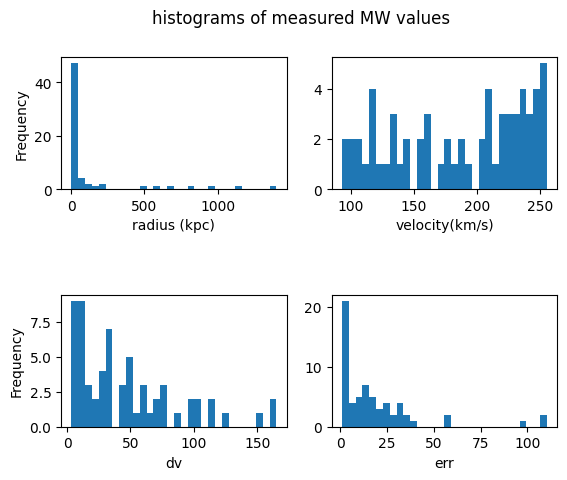

In [26]:
#exploratory data analysis for milky way

#do subplots instead of doing 4 seperate graphs

fig, ax = plt.subplots(2,2)
fig.suptitle("histograms of measured MW values")
ax[0,0].hist(mw['r'], bins=30)
ax[0,0].set_xlabel("radius (kpc)")
ax[0,0].set_ylabel("Frequency")

ax[0,1].hist(mw['v'], bins=30)
ax[0,1].set_xlabel("velocity(km/s)")

ax[1,0].hist(mw['dv'], bins=30)
ax[1,0].set_xlabel("dv")
ax[1,0].set_ylabel("Frequency")

ax[1,1].hist(mw['err'], bins=30)
ax[1,1].set_xlabel("err")



fig.subplots_adjust(hspace=0.8)

plt.show()


#^^change to squares histogram.

Figure 3: Histogram like in Figure 1 showing the radius, velocity and dv & err uncertainties, but for Milky Way. The radius measured also peaks around 0-50 kpc, and ranges to around 1400 kpc. The velocity, however, seems to be slightly more evenly distributed, yet increases in frequency as the velocity increases after 200 km/s. Though, the velocity range of this galaxy (around 100-250 km/s) is slightly different than that of Andromeda (around 120-340 km/s). Moreover, the range of the "err" uncertainties is larger than that of the Andromeda measurements.

In [27]:
#now try the getradii

print(getradii(mw, 1, mwSize/2)[0])

14.698


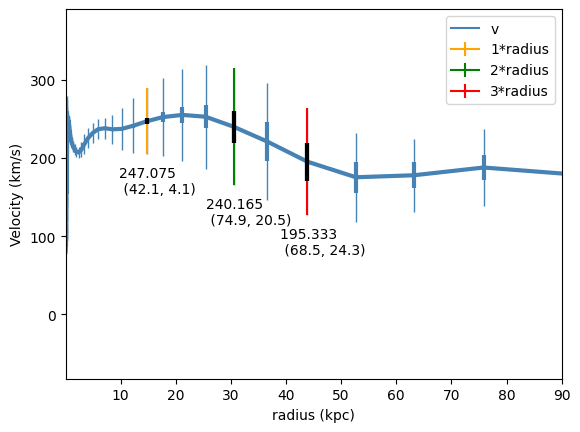

In [28]:
plotGal(mw, (mwSize/2))

Figure 4: The rotational graph of Milky Way, showing velocity vs. radius, and values corresponding to the smallest radii in the dataset at least N=1,2,3 times the radius of the visible galaxy described in the legend. These marked points occur much sooner in radii compared to Andromeda.

Moreover, this plot shows a stronger general decrease in velocity vs. radius, which slightly aligns more to the expected relationship. In Sofue (2015), the rotational velocity is plotted through a larger radius range and it is shown that this general decreasing trend continues up to ~160 kpc. The velocity then suddenly increases at that point. The study describes this region to be the "dark halo".

##Ratios for Milky Way

In [29]:
vratios(mw, mwSize/2, 1, err='dv')
print(" ")
vratios(mw, mwSize/2, 1, err='err')

At N=1 and error = dv:
Our expected velocity ratio drop from N=1, computed by the radii, is: 1.00000
The calculated ratio value from velocity data: 1.00000 +/- 0.37339
The 2-sigma upper and lower limits of this ratio is then 1.74678 and 0.25322
The expected ratio is within 2-sigma of the calculated ratio
 
At N=1 and error = err:
Our expected velocity ratio drop from N=1, computed by the radii, is: 1.00000
The calculated ratio value from velocity data: 1.00000 +/- 0.08143
The 2-sigma upper and lower limits of this ratio is then 1.16285 and 0.83715
The expected ratio is within 2-sigma of the calculated ratio


In [30]:
vratios(mw, mwSize/2, 2, err='dv')
print(" ")
vratios(mw, mwSize/2, 2, err='err')

At N=2 and error = dv:
Our expected velocity ratio drop from N=1, computed by the radii, is: 0.76073
The calculated ratio value from velocity data: 0.77217 +/- 0.33892
The 2-sigma upper and lower limits of this ratio is then 1.45002 and 0.09432
The expected ratio is within 2-sigma of the calculated ratio
 
At N=2 and error = err:
Our expected velocity ratio drop from N=1, computed by the radii, is: 0.76073
The calculated ratio value from velocity data: 0.77217 +/- 0.10591
The 2-sigma upper and lower limits of this ratio is then 0.98399 and 0.56036
The expected ratio is within 2-sigma of the calculated ratio


In [31]:
vratios(mw, mwSize/2, 3, err='dv')
print(" ")
vratios(mw, mwSize/2, 3, err='err')

At N=3 and error = dv:
Our expected velocity ratio drop from N=1, computed by the radii, is: 0.57871
The calculated ratio value from velocity data: 0.74278 +/- 0.27619
The 2-sigma upper and lower limits of this ratio is then 1.29516 and 0.19040
The expected ratio is within 2-sigma of the calculated ratio
 
At N=3 and error = err:
Our expected velocity ratio drop from N=1, computed by the radii, is: 0.57871
The calculated ratio value from velocity data: 0.74278 +/- 0.07748
The 2-sigma upper and lower limits of this ratio is then 0.89774 and 0.58782
The expected ratio is NOT within 2-sigma of the calculated ratio


In [32]:
vratios(mw, mwSize/2, 4, err='dv')
print(" ")
vratios(mw, mwSize/2, 4, err='err')

At N=4 and error = dv:
Our expected velocity ratio drop from N=1, computed by the radii, is: 0.52828
The calculated ratio value from velocity data: 0.71036 +/- 0.31047
The 2-sigma upper and lower limits of this ratio is then 1.33129 and 0.08943
The expected ratio is within 2-sigma of the calculated ratio
 
At N=4 and error = err:
Our expected velocity ratio drop from N=1, computed by the radii, is: 0.52828
The calculated ratio value from velocity data: 0.71036 +/- 0.09221
The 2-sigma upper and lower limits of this ratio is then 0.89479 and 0.52593
The expected ratio is within 2-sigma of the calculated ratio


Computing the expected ratio in comparison with the measured ratios, it is also shown here that using the uncertainty "dv", the expected ratio lies within 2-sigma of the observed velocity throughout N=1,2,3,4, yet for "err", the value strays from the respective range at N=3. Compared to Andromeda, the values seem to follow the v vs. r theoretical inverse relationship more closely, for the range of N, as also seen in Figure 3. Though, this does not mean that dark matter does not occur in this galaxy--as the expected ratio was shown not to be within 2-sigma of the calculated ratio with "err" in N=3. Therefore, we might need to compute this comparison for larger values of N, to see whether a stronger impact of dark matter occurs, which could be a direction of further study.